# Day2: **1:1 문의 내용 기반 문의유형 자동 분류 모델링**

----------


### <span style="color:green;background-color:#fff5b1">[미션0] 오늘의 목표: </span><span style="color:red;background-color:#fff5b1">중요 키워드 시각화 및 교육 개선 인사이트 도출</span>

* 1:1 질문들 속에서 중요한 키워드를 찾아 교육에 반영하는 일은 교육 개발에 중요한 일 입니다.
* 그러나 수많은 설문조사에서 중요한 키워드를 수기로 찾아내는 일은 많은 리소스와 시간이 필요 합니다.
* 오늘의 미션을 통해 자연어 데이터를 시각화하여 그 속에서 중요한 키워드를 도출하고 어느 부분에 개선이 필요한지 인사이트를 도출해 주세요.


----------

### <span style="color:green;background-color:#fff5b1">[미션1] 개발환경 설정하기</span>

자연어 데이터에서 중요 키워드를 도출하기 위해 개발환경을 설정하고 데이터를 정리 합니다.
* 필요 라이브러리를 호출하기
* 데이터 파일 불러오기
* 데이터셋 합치기
* 불필요 컬럼 삭제하기
* '\n'(줄바꿈문자 또는 개행문자) 삭제하기




In [81]:
# 필요 라이브러리를 호출하기
## 필요한 라이브러리는 추가로 불러 오세요.
## 프로젝트를 진행하며 필요한 라이브러리는 추가로 설치 하세요.

import pandas as pd    # pandas 데이터프레임을 생성/편집하기 위해 사용 합니다.
import numpy as np    # numpy 행렬을 생성/편집하기 위해 사용 합니다.
import matplotlib.pyplot as plt    # 데이터를 각종 차트로 시각화하기 위해 사용 합니다.
from wordcloud import WordCloud    # 워드 클라우드를 생성하기 위해 사용 합니다.
from collections import Counter    # 단어의 수를 카운트하기 위해 사용 합니다.
import re    # 정규표현식을 사용하기 위해 사용 합니다.
from PIL import Image # 이미지를 로드 할때 사용합니다.


font_path = 'malgun.ttf' # 워드클라우드 한글 폰트 사용


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False




In [82]:
# 데이터 파일 불러오기
## 'QnA_train_data.csv' 파일 불러와 train_df 변수에 할당 합니다.
## 'QnA_test_data.csv' 파일 불러와 test_df 변수에 할당 합니다.

train_df = pd.read_csv('QnA_train_data.csv')
test_df = pd.read_csv('QnA_test_data.csv')



In [83]:
# 데이터셋 합치기
## train_df 데이터와 test_df 데이터를 합쳐서 하나의 데이터셋으로 만들어 줍니다.
## 합쳐진 데이터를 data 변수에 할당하고 인덱스를 reset 합니다.

data = pd.concat([train_df, test_df], ignore_index=True)
data.head()

,트랙,지역,문의내용,문의유형
0,DX컨설턴트,수도권,"inplace= True 를 사용하는 기준이 존재하는 것인지, 아니면 함수나 메소드...",코드2
1,AI개발자,수도권,참조파일2에 대한 (yolo부분) 답안 파일이 올라오지 않은 것 같습니다!,시스템 운영
2,AI개발자,전남/전북,"AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요..?\n맞다면, 질문드립니...",시스템 운영
3,DX컨설턴트,충남/충북,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,코드1
4,DX컨설턴트,대구/경북,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여\n운전을 못하는 관광객 ...,이론


In [84]:
# 불필요 컬럼 삭제하기
## drop 함수를 사용하여 필요없는 컬럼을 삭제 합니다.
## 삭제할 컬럼: ['트랙', '지역']


#data.drop(columns=['트랙', '지역'], inplace=True)

data.head()


,트랙,지역,문의내용,문의유형
0,DX컨설턴트,수도권,"inplace= True 를 사용하는 기준이 존재하는 것인지, 아니면 함수나 메소드...",코드2
1,AI개발자,수도권,참조파일2에 대한 (yolo부분) 답안 파일이 올라오지 않은 것 같습니다!,시스템 운영
2,AI개발자,전남/전북,"AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요..?\n맞다면, 질문드립니...",시스템 운영
3,DX컨설턴트,충남/충북,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,코드1
4,DX컨설턴트,대구/경북,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여\n운전을 못하는 관광객 ...,이론


In [85]:
# '\n'(줄바꿈문자 또는 개행문자) 삭제하기
## 줄바꿈문자는 워드클라우드에서 에러를 일으켜 삭제 해야 합니다.
## 반복문을 사용하여 data['문의내용']의 각 열에서 '\n'을 ' '으로 변경 한 후
## 다시 data['문의내용']에 넣어 줍니다.

data['문의내용'] = data['문의내용'].apply(lambda x: x.replace('\n', ' '))


### <span style="color:green;background-color:#fff5b1"> [미션2] 코드 유형 문의내용 분리하기</span>

가장 질문이 많은 코드1과 코드2의 내용을 워드클라우드로 시각화하기위해 코드 데이터만 따로 분리 합니다.

* data['문의유형'] 이 코드1, 코드2 데이터 분리하기
* 단어 리스트 생성하기
* 전체 단어 빈도수 카운트하기



In [86]:
# data['문의유형'] 이 코드1, 코드2 데이터 분리하기
## data['문의유형'] 열의 값이(유형이) 코드1, 코드2 인 행의 data['문의내용'] 을 담을 type_questions 변수를 pd.Series 타입으로 생성하고 초기화 합니다.
## 반복문을 사용하여 data['문의유형'] 열의 값이(유형이) '코드1', '코드2' 인 값을 type_questions 변수에 할당 합니다.



type_questions = pd.Series()


for i in data.index:

    if data['문의유형'].iloc[i] in ['코드1', '코드2']:
 
        type_questions.loc[i] = data['문의내용'].iloc[i]


C:\Users\user\AppData\Local\Temp\ipykernel_6448\2831464122.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  type_questions = pd.Series()


In [87]:
# 단어 리스트 생성하기
## 각 문의에서 단어를 분리해서 담을 word_list 변수를 리스트 타입으로 생성 합니다.
## 반복문을 사용하여 type_questions 데이터의 각 행의 문장이 단어의 모음이 되도록 띄어쓰기(' ') 기준으로 split 합니다.
## 각 행에서 분리된 단어들을 다시 반복문을 이용해 word_list 변수에 단어를 한개씩 append 해 줍니다.
## 단어별 빈도수 체크를 위해 최종 word_list 의 차원이 1차원 인지 확인 합니다.
## [TIP] 이중 반복문을 사용하면 쉽게 단어를 분리하고 모을 수 있습니다.


word_list = []
for sent in type_questions:
    words = sent.split(' ')
    
    for word in words:
        word_list.append(word)


word_list


['inplace=',
 'True',
 '를',
 '사용하는',
 '기준이',
 '존재하는',
 '것인지,',
 '아니면',
 '함수나',
 '메소드에',
 '따라',
 '외워야하는',
 '것인지',
 '궁금합니다.',
 '',
 '또한',
 'inplace를',
 '사용해야',
 '하는',
 '대표적인',
 '함수나',
 '메소드들이',
 '궁금합니다.',
 '예제는',
 '잘',
 '작동한',
 '것',
 '같은데',
 '채점하니',
 '케이스',
 '1만',
 '성공하고',
 '나머지가',
 'fail이',
 '떠',
 '실패했습니다.',
 '제가',
 '어디서',
 '틀렸는지',
 '잘',
 '모르겠습니다.',
 '아니면',
 '제가',
 '한',
 '방법',
 '말고',
 '더',
 '좋은',
 '방법이',
 '있을까요?',
 '',
 '실습',
 '내용중',
 '오존',
 '변수의',
 '결측치를',
 '다른',
 '값으로',
 '바꿔서',
 '처리할려고',
 '했습니다,',
 'target1',
 '=',
 "'ozone'",
 'temp',
 '=',
 'tr_abc[target1]',
 '',
 '',
 'temp=temp.fillna(0.000)',
 'temp.unique()',
 '',
 '위와',
 '같은',
 '코드로',
 '결측치를',
 '바꿨고',
 '유니크',
 '메소드에서',
 '정상적으로',
 '0으로',
 '표시되면서',
 '바뀌는',
 '것을',
 '확인했습니다.',
 '',
 '그러나',
 '이후',
 '다시',
 '유니크',
 '메소드를',
 '실행했더니',
 '결측치가',
 '0으로',
 '바뀌지',
 '않고',
 'nan',
 '값으로',
 '표기되어서',
 '나와',
 '있습니다.',
 '어디서',
 '잘못된건지',
 '알려주실',
 '수',
 '있을까요?',
 '오존',
 '이변량',
 '분석',
 '중입니다',
 "spst.pearsonr(bike['ozone'],bike['count'])",
 '이렇게',


In [88]:
# 전체 단어 빈도수 카운트하기
## Counter 함수를 사용하여 word_list 변수에 포함된 각 단어의 빈도수를 산출하여 word_count에 할당 합니다.

from collections import Counter

word_count = Counter(word_list)



### <span style="color:green;background-color:#fff5b1"> [미션3]워드클라우드 생성하기1</span>

1:1 문의에서 반복되는 키워드를 파악하기 위하여 워드클라우드를 생성하고 단어별 빈도수를 체크 합니다.<br>
모든 데이터를 한 문단으로 합쳐서 워드클라우드를 생성 할 수도 있지만, 미프4-1차 에서는 단어별 빈도수를 활용하여 워드클라우드를 생성 합니다.<br>
생성된 워드클라우드에서 교육생들이 어려워 하는 부분이 무엇인지 생각해 보세요.
* 워드클라우드 생성하기
* 단어별 빈도수로 정렬하기

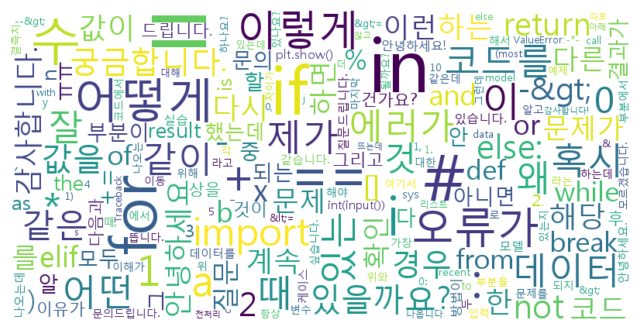

In [89]:
# 워드클라우드 생성하기
## 각 단어의 빈도수가 저장되어 있는 word_count 변수로 워드클라우드를 생성합니다.
## 높이, 넓이, 색상 등 생성하는 워드클라우드의 파라미터를 알맞게 조절 합니다.
## 워드클라우드 생성 매서드는 .generate_from_frequencies 를 사용합니다.
## [tip] 한 문단으로 워드클라우드로 만들때는 generate 매서드 사용
## [tip] 단어와 빈도수를 가지고 워드클라우드를 만들때는 generate_from_frequencies 매서드 사용


from wordcloud import WordCloud
import matplotlib.pyplot as plt


# 워드클라우드 생성
origin_cloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
).generate_from_frequencies(word_count)

# 생성된 워드클라우드 출력
plt.figure(figsize=(8,7))
plt.imshow(origin_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [90]:
# 단어별 빈도수로 정렬하기
## Counter 함수의 .most_common 매서드를 사용하여 word_count에 저장된 단어의 빈도수를 내림차순으로 출력 합니다.
## 가장 많이 사용된 단어들이 무엇인지 확인 합니다.

most_common_words = word_count.most_common()


for word, count in most_common_words:
    print(f"{word}: {count}")



: 32914
=: 2383
in: 689
#: 604
if: 540
for: 493
==: 372
i: 357
수: 320
:: 281
+: 281
어떻게: 270
오류가: 215
1: 204
a: 204
이렇게: 193
*: 191
이: 176
import: 171
있는: 159
제가: 154
0: 154
코드를: 154
때: 152
데이터: 150
어떤: 148
혹시: 146
에러가: 137
-: 137
같이: 136
잘: 135
왜: 132
not: 129
같은: 125
것: 124
2: 122
else:: 120
return: 114
있을까요?: 111
값을: 111
x: 108
-&gt;: 108
궁금합니다.: 107
경우: 105
elif: 102
해당: 99
and: 99
다시: 98
[]: 96
코드: 95
감사합니다.: 95
값이: 94
b: 93
or: 90
+=: 89
안녕하세요: 88
계속: 86
한: 85
하면: 83
하는: 82
질문: 78
문제: 77
def: 77
문제가: 77
): 76
다른: 75
%: 75
이런: 74
while: 74
break: 73
from: 73
of: 73
확인: 73
를: 72
부분이: 72
모두: 72
알: 71
the: 71
중: 71
result: 71
아니면: 70
n: 69
안: 68
할: 67
되는: 66
결과가: 65
다: 63
문의: 62
그: 62
했는데: 62
as: 61
is: 61
ㅠㅠ: 61
드립니다.: 61
것이: 60
그리고: 60
3: 60
건가요?: 60
상을: 59
후: 59
이유가: 59
,: 58
2.: 58
다음과: 58
plt.show(): 58
방법이: 57
안녕하세요!: 57
모델: 57
sys: 57
질문드립니다.: 56
실습: 55
있습니다.: 55
int(input()): 55
케이스: 54
to: 54
데이터를: 54
안녕하세요.: 54
같습니다.: 53
y: 53
나오는데: 53
두: 53
문의드립니다.: 53
이해가: 52
알고: 52
문제를: 

### <span style="color:green;background-color:#fff5b1">[미션4] 데이터 전처리하기

전처리하지 않은 데이터로 워드클라우드를 만들면 특수문자, 조사, 인사말 등 불용어의 반복이 많아 인사이트 도출이 어렵습니다.
그래서 데이터 클렌징 작업을 통해 의미있는 키워드만 분류해서 다시 워드클라우드를 생성 합니다.
* 특수문자 제거하기
* 단어 분리하기
* 불용어 제거하기
* 한글자 단어 제거하기


In [91]:
# [실행코드] 특수문자 제거 함수 실행
## 아래의 함수 생성 코드를 실행해 주세요
## 아래의 특수문자 이외의 특수문제 제거가 필요한 경우 자유롭게 추가하여 사용하세요.

removal_list =  "‘, ’, ◇, ‘, ”,  ’, ', ·, \“, ·, △, ●,  , ■, (, ), \", >>, `, /, #, ∼, =,ㆍ<,>, .,?, !,【,】, …, ◆,%, ₩"
def remove_special(sentence: str = None):

    sentence = re.sub("[.,\'\"’‘”“!?]", "", sentence)
    sentence = re.sub("[^ㄱ-ㅎ가-힣a-zA-Z\\s]", " ", sentence)
    sentence = re.sub("\s+", " ", sentence)
    sentence = sentence.translate(str.maketrans(removal_list, ' '*len(removal_list)))
    sentence = sentence.strip()
    sentence = sentence.replace('\n', ' ')

    return sentence

# [실행코드] 특수문자를 제거하는 함수

In [92]:
# 특수문자 제거하기
## data['문의내용'] 각 행에서 특수 문제를 제거 후 결과를 담을 data['특수문자제거'] 빈 열을 생성 합니다.
## remove_special 함수를 사용하여 data['문의내용']의 각 행에서 특수문자를 제거하고 data['특수문자제거'] 열에 결과를 할당해 주세요.

import re

# 함수 정의: 특수 문자 제거
def remove_special(text):
    # 정규 표현식을 사용하여 특수 문자 제거
    cleaned_text = re.sub(r'[^a-zA-Z0-9가-힣\s]', '', text)
    return cleaned_text

# data['문의내용']의 각 행에 remove_special 함수를 적용하여 특수 문자 제거
data['특수문자제거'] = data['문의내용'].apply(remove_special)

# 결과 출력
data

,트랙,지역,문의내용,문의유형,특수문자제거
0,DX컨설턴트,수도권,"inplace= True 를 사용하는 기준이 존재하는 것인지, 아니면 함수나 메소드...",코드2,inplace True 를 사용하는 기준이 존재하는 것인지 아니면 함수나 메소드에 ...
1,AI개발자,수도권,참조파일2에 대한 (yolo부분) 답안 파일이 올라오지 않은 것 같습니다!,시스템 운영,참조파일2에 대한 yolo부분 답안 파일이 올라오지 않은 것 같습니다
2,AI개발자,전남/전북,"AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요..? 맞다면, 질문드립니다...",시스템 운영,AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요 맞다면 질문드립니다 구글링...
3,DX컨설턴트,충남/충북,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,코드1,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...
4,DX컨설턴트,대구/경북,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,이론,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...
...,...,...,...,...,...
3785,DX컨설턴트,대구/경북,"어디가 잘못되었는지 모르겠어요ㅜㅜ N = list(map(int, input()....",코드1,어디가 잘못되었는지 모르겠어요 N listmapint inputsplit n1 ...
3786,DX컨설턴트,수도권,실습교안 102 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니...,웹,실습교안 102 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니...
3787,AI개발자,충남/충북,ubuntu 파일 이 안 열립니다,웹,ubuntu 파일 이 안 열립니다
3788,DX컨설턴트,수도권,4. 데이터 분석 항복에 있는 6개의 문제에 대한 코드와 그래프 확인 부탁드립니다....,코드2,4 데이터 분석 항복에 있는 6개의 문제에 대한 코드와 그래프 확인 부탁드립니다 나...


In [93]:
# 단어 분리하기
## data['특수문자제거'] 각 행의 문장을 단어의 모음으로 분리 한 결과를 담을 data['단어분리'] 빈 열을 생성 합니다.
## 반복문을 사용하여 data['특수문자제거']의 각 행의 문장을 띄어쓰기(' ') 기준으로 split 하여
## 같은 행의 data['단어분리'] 열에 할당 합니다.
## [참고] 딥러닝 시간에 배운 KoNLPy 라이브러리의 Okt 형태소 분석기를 사용해도 됩니다.

data['단어분리'] = data['특수문자제거'].apply(lambda x: x.split(' '))

# 결과 출력
data.head()




,트랙,지역,문의내용,문의유형,특수문자제거,단어분리
0,DX컨설턴트,수도권,"inplace= True 를 사용하는 기준이 존재하는 것인지, 아니면 함수나 메소드...",코드2,inplace True 를 사용하는 기준이 존재하는 것인지 아니면 함수나 메소드에 ...,"[inplace, True, 를, 사용하는, 기준이, 존재하는, 것인지, 아니면, ..."
1,AI개발자,수도권,참조파일2에 대한 (yolo부분) 답안 파일이 올라오지 않은 것 같습니다!,시스템 운영,참조파일2에 대한 yolo부분 답안 파일이 올라오지 않은 것 같습니다,"[참조파일2에, 대한, yolo부분, 답안, 파일이, 올라오지, 않은, 것, 같습니..."
2,AI개발자,전남/전북,"AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요..? 맞다면, 질문드립니다...",시스템 운영,AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요 맞다면 질문드립니다 구글링...,"[AICE, 시험, 관련하여, 이렇게, 1대1로, 질문하는게, 맞나요, 맞다면, 질..."
3,DX컨설턴트,충남/충북,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,코드1,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,"[예제는, 잘, 작동한, 것, 같은데, 채점하니, 케이스, 1만, 성공하고, 나머지..."
4,DX컨설턴트,대구/경북,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,이론,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,"[제주관광공사를, 대상으로, 관광지, 순환, 버스, 솔루션을, 도입하여, 운전을, ..."


In [94]:
# [실행코드] 조사, 인사말, 불용어 제거 함수 실행
## 아래의 함수 생성 코드를 실행해 주세요
## 아래의 불용어 이외의 불용어 제거가 필요한 경우 자유롭게 추가하여 사용하세요. 

def remove_stopword(sent):
    stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','을','으로','자','에','와','한','이', '로', '에서', '하는', '하면', '하고', '요', '혹시', '합니다', '감사합니다', '안녕하세요']
    removed = [word for word in sent if not word in stopwords] # 불용어 제거
    return removed

# [실행코드] 조사, 인사말, 불용어를 제거하는 함수

In [95]:
# 불용어 제거하기
## 자연어를 예측할 때 데이터에 조사, 접속사, 감탄사, 인사말 등이 포함되면 불필요한 자원 및 시간을 사용 할 수 있습니다.
## 불필요한 자원사용 방지를 위해 데이터에서 불용어를 제거해 줍니다.
## data['단어분리'] 에서 불용어를 제한 한 뒤 결과를 담을 data['불용어제거'] 열을 생성해 줍니다.
## remove_stopword 함수를 사용하여 data['단어분리']에서 불용어를 제거하고 결과를 data['불용어제거'] 열에 할당 합니다.
## [TIP] 모델의 정확도 향상을 위해 제거하고 싶은 불용어가 있을 경우 remove_stopword 함수의 stopwords 변수에 추가해 주세요.



# 함수 정의: 불용어 제거
def remove_stopword(word_list):
    stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','을','으로','자','에','와','한','이', '로', '에서', '하는', '하면', '하고', '요', '혹시', '합니다', '감사합니다', '안녕하세요']
    return [word for word in word_list if word not in stopwords]

# '단어분리' 열에서 불용어 제거하여 '불용어제거' 열 생성
data['불용어제거'] = data['단어분리'].apply(remove_stopword)

# 결과 출력
data.head()


,트랙,지역,문의내용,문의유형,특수문자제거,단어분리,불용어제거
0,DX컨설턴트,수도권,"inplace= True 를 사용하는 기준이 존재하는 것인지, 아니면 함수나 메소드...",코드2,inplace True 를 사용하는 기준이 존재하는 것인지 아니면 함수나 메소드에 ...,"[inplace, True, 를, 사용하는, 기준이, 존재하는, 것인지, 아니면, ...","[inplace, True, 사용하는, 기준이, 존재하는, 것인지, 아니면, 함수나..."
1,AI개발자,수도권,참조파일2에 대한 (yolo부분) 답안 파일이 올라오지 않은 것 같습니다!,시스템 운영,참조파일2에 대한 yolo부분 답안 파일이 올라오지 않은 것 같습니다,"[참조파일2에, 대한, yolo부분, 답안, 파일이, 올라오지, 않은, 것, 같습니...","[참조파일2에, 대한, yolo부분, 답안, 파일이, 올라오지, 않은, 것, 같습니..."
2,AI개발자,전남/전북,"AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요..? 맞다면, 질문드립니다...",시스템 운영,AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요 맞다면 질문드립니다 구글링...,"[AICE, 시험, 관련하여, 이렇게, 1대1로, 질문하는게, 맞나요, 맞다면, 질...","[AICE, 시험, 관련하여, 이렇게, 1대1로, 질문하는게, 맞나요, 맞다면, 질..."
3,DX컨설턴트,충남/충북,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,코드1,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,"[예제는, 잘, 작동한, 것, 같은데, 채점하니, 케이스, 1만, 성공하고, 나머지...","[예제는, 작동한, 것, 같은데, 채점하니, 케이스, 1만, 성공하고, 나머지가, ..."
4,DX컨설턴트,대구/경북,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,이론,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,"[제주관광공사를, 대상으로, 관광지, 순환, 버스, 솔루션을, 도입하여, 운전을, ...","[제주관광공사를, 대상으로, 관광지, 순환, 버스, 솔루션을, 도입하여, 운전을, ..."


In [96]:
# 한글자 단어 제거하기
## 한글자 단어는 단어의 중요도에 비해 빈도수가 너무 높아 모델 정확도 향상에 방해가 될 수 있습니다.
## data['불용어제거'] 에 각 행에서 한글자 단어를 제거 후 결과를 담을 data['한글자제거'] 빈 열을 추가 합니다.
## 각 행마다 한글자 단어를 제거후 남은 단어들을 담을 data['한글자제거'] 열을 생성 합니다.
## 반복문을 사용하여 data['불용어제거'] 의 각 행에서 단어 추출하고 단어의 글자수(len)을 측정하여 2글자 이상인 단어만 data['한글자제거'] 열에 할당해 줍니다.
## [Tip] 2중 for 를 사용하여 data['불용어제거']에서 각 행을 불러오고, 불러온 각 행에서 단어들을 불러와서 한글자 단어를 제거 합니다.
## [Tip] 리스트 변수를 하나 생성하여 한글자 단어를 제거한 단어들을 나머지 단어들을 append 하고 해당 행의 두글자 이상의 단어들이 다 모이면 data['한글자제거']에 할당 합니다.

data['한글자제거'] = ""

for i in data.index:
    words_without_single_char = [word for word in data['불용어제거'].iloc[i] if len(word) > 1]
    data['한글자제거'].iloc[i] = words_without_single_char

# 결과 출력
data


,트랙,지역,문의내용,문의유형,특수문자제거,단어분리,불용어제거,한글자제거
0,DX컨설턴트,수도권,"inplace= True 를 사용하는 기준이 존재하는 것인지, 아니면 함수나 메소드...",코드2,inplace True 를 사용하는 기준이 존재하는 것인지 아니면 함수나 메소드에 ...,"[inplace, True, 를, 사용하는, 기준이, 존재하는, 것인지, 아니면, ...","[inplace, True, 사용하는, 기준이, 존재하는, 것인지, 아니면, 함수나...","[inplace, True, 사용하는, 기준이, 존재하는, 것인지, 아니면, 함수나..."
1,AI개발자,수도권,참조파일2에 대한 (yolo부분) 답안 파일이 올라오지 않은 것 같습니다!,시스템 운영,참조파일2에 대한 yolo부분 답안 파일이 올라오지 않은 것 같습니다,"[참조파일2에, 대한, yolo부분, 답안, 파일이, 올라오지, 않은, 것, 같습니...","[참조파일2에, 대한, yolo부분, 답안, 파일이, 올라오지, 않은, 것, 같습니...","[참조파일2에, 대한, yolo부분, 답안, 파일이, 올라오지, 않은, 같습니다]"
2,AI개발자,전남/전북,"AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요..? 맞다면, 질문드립니다...",시스템 운영,AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요 맞다면 질문드립니다 구글링...,"[AICE, 시험, 관련하여, 이렇게, 1대1로, 질문하는게, 맞나요, 맞다면, 질...","[AICE, 시험, 관련하여, 이렇게, 1대1로, 질문하는게, 맞나요, 맞다면, 질...","[AICE, 시험, 관련하여, 이렇게, 1대1로, 질문하는게, 맞나요, 맞다면, 질..."
3,DX컨설턴트,충남/충북,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,코드1,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,"[예제는, 잘, 작동한, 것, 같은데, 채점하니, 케이스, 1만, 성공하고, 나머지...","[예제는, 작동한, 것, 같은데, 채점하니, 케이스, 1만, 성공하고, 나머지가, ...","[예제는, 작동한, 같은데, 채점하니, 케이스, 1만, 성공하고, 나머지가, fai..."
4,DX컨설턴트,대구/경북,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,이론,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,"[제주관광공사를, 대상으로, 관광지, 순환, 버스, 솔루션을, 도입하여, 운전을, ...","[제주관광공사를, 대상으로, 관광지, 순환, 버스, 솔루션을, 도입하여, 운전을, ...","[제주관광공사를, 대상으로, 관광지, 순환, 버스, 솔루션을, 도입하여, 운전을, ..."
...,...,...,...,...,...,...,...,...
3785,DX컨설턴트,대구/경북,"어디가 잘못되었는지 모르겠어요ㅜㅜ N = list(map(int, input()....",코드1,어디가 잘못되었는지 모르겠어요 N listmapint inputsplit n1 ...,"[어디가, 잘못되었는지, 모르겠어요, , N, , listmapint, inputs...","[어디가, 잘못되었는지, 모르겠어요, , N, , listmapint, inputs...","[어디가, 잘못되었는지, 모르겠어요, listmapint, inputsplit, n..."
3786,DX컨설턴트,수도권,실습교안 102 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니...,웹,실습교안 102 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니...,"[실습교안, 102, 쪽, 진행중인데, 이전단계에서, 실습, 교안대로, 진행했는데,...","[실습교안, 102, 쪽, 진행중인데, 이전단계에서, 실습, 교안대로, 진행했는데,...","[실습교안, 102, 진행중인데, 이전단계에서, 실습, 교안대로, 진행했는데, 사진..."
3787,AI개발자,충남/충북,ubuntu 파일 이 안 열립니다,웹,ubuntu 파일 이 안 열립니다,"[ubuntu, 파일, 이, 안, 열립니다]","[ubuntu, 파일, 안, 열립니다]","[ubuntu, 파일, 열립니다]"
3788,DX컨설턴트,수도권,4. 데이터 분석 항복에 있는 6개의 문제에 대한 코드와 그래프 확인 부탁드립니다....,코드2,4 데이터 분석 항복에 있는 6개의 문제에 대한 코드와 그래프 확인 부탁드립니다 나...,"[4, 데이터, 분석, 항복에, 있는, 6개의, 문제에, 대한, 코드와, 그래프, ...","[4, 데이터, 분석, 항복에, 있는, 6개의, 문제에, 대한, 코드와, 그래프, ...","[데이터, 분석, 항복에, 있는, 6개의, 문제에, 대한, 코드와, 그래프, 확인,..."


### <span style="color:green;background-color:#fff5b1"> [미션5]워드클라우드 생성하기2</span>

데이터 클렌징 전 생성한 WordCloud 와 데이터 클렌징 후 생성한 WordCloud 를 비교하고 차이점이 무엇인지 생각해 보세요.
* data['문의유형'] 이 코드1, 코드2 데이터 분리하기
* 단어 리스트 생성하기
* 전체 단어 빈도수 카운트하기
* 워드클라우드 만들기
* 워드클라우드 비교하기


In [97]:
# data['문의유형'] 이 코드1, 코드2 데이터 분리하기
## data['문의유형'] 열의 값이(유형이) 코드1, 코드2 인 행의 data['한글자제거'] 을 담을
## type_questions 변수를 pd.Series 타입으로 생성하고 초기화 합니다.
## 반복문을 사용하여 data['문의유형'] 열의 값이(유형이) '코드1', '코드2' 인 data['한글자제거']의 값을 type_questions 변수에 할당 합니다.


type_questions = pd.Series()


for i in data.index:
    if data['문의유형'].iloc[i] in ['코드1', '코드2']:
        type_questions.loc[i] = data['한글자제거'].iloc[i]

# 결과 확인
print(type_questions)

type_questions


C:\Users\user\AppData\Local\Temp\ipykernel_6448\219251855.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  type_questions = pd.Series()


0       [inplace, True, 사용하는, 기준이, 존재하는, 것인지, 아니면, 함수나...
3       [예제는, 작동한, 같은데, 채점하니, 케이스, 1만, 성공하고, 나머지가, fai...
9       [실습, 내용중, 오존, 변수의, 결측치를, 다른, 값으로, 바꿔서, 처리할려고, ...
15      [오존, 이변량, 분석, 중입니다, spstpearsonrbikeozonebikec...
20      [seouldropseoulmovinglocseoulmoving도착시간, seoul...
                              ...                        
3782    [3번, 문제에서, 외국인, 정보가, 1981, 1984년이, 누락되어, 결측치가,...
3783    [bins, 030, 80, 150, 160, trindataPM25, level,...
3785    [어디가, 잘못되었는지, 모르겠어요, listmapint, inputsplit, n...
3788    [데이터, 분석, 항복에, 있는, 6개의, 문제에, 대한, 코드와, 그래프, 확인,...
3789    [imglist는, train의, jpg, 리스트, for, in, imglist,...
Length: 1611, dtype: object


0       [inplace, True, 사용하는, 기준이, 존재하는, 것인지, 아니면, 함수나...
3       [예제는, 작동한, 같은데, 채점하니, 케이스, 1만, 성공하고, 나머지가, fai...
9       [실습, 내용중, 오존, 변수의, 결측치를, 다른, 값으로, 바꿔서, 처리할려고, ...
15      [오존, 이변량, 분석, 중입니다, spstpearsonrbikeozonebikec...
20      [seouldropseoulmovinglocseoulmoving도착시간, seoul...
                              ...                        
3782    [3번, 문제에서, 외국인, 정보가, 1981, 1984년이, 누락되어, 결측치가,...
3783    [bins, 030, 80, 150, 160, trindataPM25, level,...
3785    [어디가, 잘못되었는지, 모르겠어요, listmapint, inputsplit, n...
3788    [데이터, 분석, 항복에, 있는, 6개의, 문제에, 대한, 코드와, 그래프, 확인,...
3789    [imglist는, train의, jpg, 리스트, for, in, imglist,...
Length: 1611, dtype: object

In [98]:
type_questions

0       [inplace, True, 사용하는, 기준이, 존재하는, 것인지, 아니면, 함수나...
3       [예제는, 작동한, 같은데, 채점하니, 케이스, 1만, 성공하고, 나머지가, fai...
9       [실습, 내용중, 오존, 변수의, 결측치를, 다른, 값으로, 바꿔서, 처리할려고, ...
15      [오존, 이변량, 분석, 중입니다, spstpearsonrbikeozonebikec...
20      [seouldropseoulmovinglocseoulmoving도착시간, seoul...
                              ...                        
3782    [3번, 문제에서, 외국인, 정보가, 1981, 1984년이, 누락되어, 결측치가,...
3783    [bins, 030, 80, 150, 160, trindataPM25, level,...
3785    [어디가, 잘못되었는지, 모르겠어요, listmapint, inputsplit, n...
3788    [데이터, 분석, 항복에, 있는, 6개의, 문제에, 대한, 코드와, 그래프, 확인,...
3789    [imglist는, train의, jpg, 리스트, for, in, imglist,...
Length: 1611, dtype: object

In [99]:
# 단어 리스트 생성하기
## 각 문의에서 단어를 분리해서 담을 cleansing_word_list 변수를 리스트 타입으로 생성 합니다.
## 이중 반복문을 사용하여 type_questions 데이터의 각 행에서 단어만 분리하여 cleansing_word_list 변수에 단어를 한개씩 append 해 줍니다.
## 최종 cleansing_word_list 의 차원이 1차원 인지 확인 합니다.


cleansing_word_list = []

for i in type_questions.index:

    cleansing_word_list.extend(data['한글자제거'].loc[i])

cleansing_word_list


['inplace',
 'True',
 '사용하는',
 '기준이',
 '존재하는',
 '것인지',
 '아니면',
 '함수나',
 '메소드에',
 '따라',
 '외워야하는',
 '것인지',
 '궁금합니다',
 '또한',
 'inplace를',
 '사용해야',
 '대표적인',
 '함수나',
 '메소드들이',
 '궁금합니다',
 '예제는',
 '작동한',
 '같은데',
 '채점하니',
 '케이스',
 '1만',
 '성공하고',
 '나머지가',
 'fail이',
 '실패했습니다',
 '제가',
 '어디서',
 '틀렸는지',
 '모르겠습니다',
 '아니면',
 '제가',
 '방법',
 '말고',
 '좋은',
 '방법이',
 '있을까요',
 '실습',
 '내용중',
 '오존',
 '변수의',
 '결측치를',
 '다른',
 '값으로',
 '바꿔서',
 '처리할려고',
 '했습니다',
 'target1',
 'ozone',
 'temp',
 'trabctarget1',
 'temptempfillna0000',
 'tempunique',
 '위와',
 '같은',
 '코드로',
 '결측치를',
 '바꿨고',
 '유니크',
 '메소드에서',
 '정상적으로',
 '0으로',
 '표시되면서',
 '바뀌는',
 '것을',
 '확인했습니다',
 '그러나',
 '이후',
 '다시',
 '유니크',
 '메소드를',
 '실행했더니',
 '결측치가',
 '0으로',
 '바뀌지',
 '않고',
 'nan',
 '값으로',
 '표기되어서',
 '나와',
 '있습니다',
 '어디서',
 '잘못된건지',
 '알려주실',
 '있을까요',
 '오존',
 '이변량',
 '분석',
 '중입니다',
 'spstpearsonrbikeozonebikecount',
 '이렇게',
 '코드',
 '쳤는데',
 'array',
 'must',
 'not',
 'contain',
 'infs',
 'or',
 'NaNs',
 '오류',
 '문구가',
 '뜨네요',
 'seouldropseoulmovinglocseoulm

In [100]:
# 전체 단어 빈도수 카운트 하기
## Counter 함수를 사용하여 cleansing_word_list 변수에 포함된 각 단어의 빈도수를 산출하여 cleansing_word_count에 할당 합니다.

cleansing_word_count = Counter(cleansing_word_list)
cleansing_word_count

Counter({'inplace': 16,
         'True': 78,
         '사용하는': 14,
         '기준이': 7,
         '존재하는': 6,
         '것인지': 40,
         '아니면': 71,
         '함수나': 2,
         '메소드에': 2,
         '따라': 19,
         '외워야하는': 1,
         '궁금합니다': 179,
         '또한': 29,
         'inplace를': 3,
         '사용해야': 9,
         '대표적인': 1,
         '메소드들이': 2,
         '예제는': 1,
         '작동한': 1,
         '같은데': 57,
         '채점하니': 1,
         '케이스': 54,
         '1만': 3,
         '성공하고': 2,
         '나머지가': 3,
         'fail이': 29,
         '실패했습니다': 2,
         '제가': 154,
         '어디서': 12,
         '틀렸는지': 4,
         '모르겠습니다': 123,
         '방법': 16,
         '말고': 10,
         '좋은': 19,
         '방법이': 57,
         '있을까요': 175,
         '실습': 63,
         '내용중': 2,
         '오존': 2,
         '변수의': 5,
         '결측치를': 16,
         '다른': 75,
         '값으로': 19,
         '바꿔서': 8,
         '처리할려고': 1,
         '했습니다': 25,
         'target1': 1,
         'ozone': 3,
         'temp': 15,
     

In [101]:
# cleansing_word_count를 빈도수 순서대로 정렬
sorted_word_count = cleansing_word_count.most_common()

# 결과 출력
for word, count in sorted_word_count:
    print(f"{word}: {count} times")


in: 690 times
if: 542 times
for: 495 times
gt: 295 times
어떻게: 270 times
오류가: 215 times
이렇게: 194 times
궁금합니다: 179 times
있을까요: 175 times
import: 171 times
else: 160 times
있는: 159 times
제가: 154 times
코드를: 154 times
데이터: 151 times
어떤: 148 times
에러가: 139 times
같이: 138 times
not: 130 times
같은: 126 times
모르겠습니다: 123 times
경우: 119 times
return: 114 times
값을: 112 times
코드: 108 times
elif: 102 times
해당: 100 times
뜹니다: 100 times
다시: 99 times
and: 99 times
드립니다: 96 times
값이: 94 times
or: 93 times
계속: 86 times
문제: 85 times
10: 84 times
있습니다: 83 times
질문드립니다: 81 times
질문: 80 times
True: 78 times
result: 78 times
문제가: 78 times
def: 77 times
break: 76 times
다른: 75 times
while: 75 times
건가요: 75 times
이런: 74 times
from: 74 times
확인: 74 times
lt: 74 times
of: 73 times
문의드립니다: 73 times
부분이: 72 times
했는데: 72 times
모두: 72 times
아니면: 71 times
the: 71 times
될까요: 68 times
같습니다: 67 times
되는: 66 times
결과가: 65 times
있나요: 65 times
is: 64 times
실습: 63 times
나오는데: 63 times
상을: 63 times
문의: 62 times
data: 61 times
as

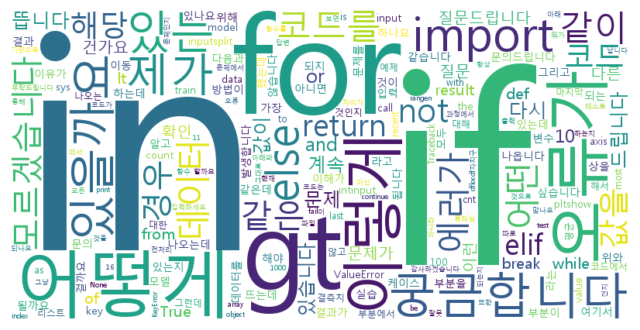

In [102]:
# 워드클라우드 만들기
## WordCloud 함수를 사용하여 각 단어의 빈도수가 저장되어 있는 cleansing_word_count 변수로 워드클라우드를 생성합니다.
## 생성하는 워드클라우드의 파라미터를 알맞게 조절 합니다.
## 워드클라우드 생성 매서드는 .generate_from_frequencies 를 사용합니다.
## <tip> 한 문의를 워드클라우드로 만들때는 generate 매서드 사용
## <tip> 각 단어와 빈도수를 가지고 워드클라우드를 만들때는 generate_from_frequencies 매서드 사용



cleansing_cloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
).generate_from_frequencies(cleansing_word_count)


plt.figure(figsize=(8,7))
plt.imshow(cleansing_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


   

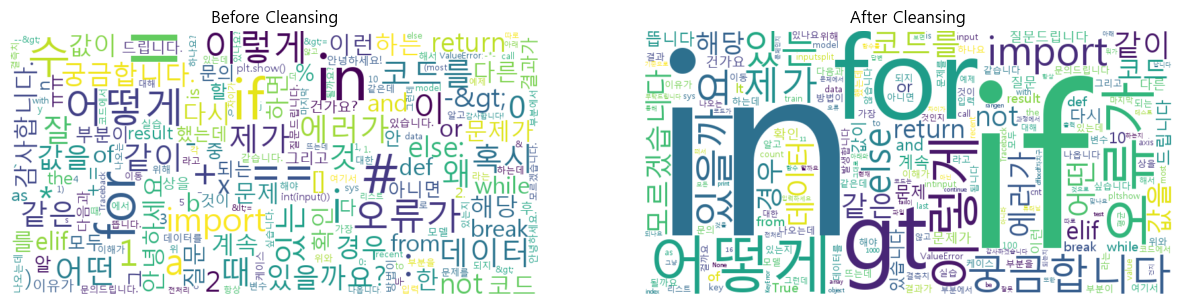

In [103]:
# 워드클라우드 비교하기
## 클렌징 전/후 워드클라우드를 한 그림으로 출력해서 어떤 차트가 더 효과적인지 비교해 보세요.

plt.figure(figsize=(15, 6))

# 클렌징 전 워드클라우드
plt.subplot(1, 2, 1)
plt.imshow(origin_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Before Cleansing')

# 클렌징 후 워드클라우드
plt.subplot(1, 2, 2)
plt.imshow(cleansing_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('After Cleansing')

plt.show()


### <span style="color:green;background-color:#fff5b1"> [미션6] 교육 개선점 찾기</span>

클렌징 한 워드클라우드와 단어 빈도수 카운트를 확인하여 교육생들이 어느부분을 자주 문의 하는지, 무엇을 어려워 하는지 파악 합니다.<br>
파악한 내용을 바탕으로 AIVLE스쿨이 어떤부분을 어떻게 개선하면 좋을지 시사점과 개선점을 도출하여 PPT에 정리해 보세요.

* 개선점 도출
* PPT 제작

#1번
if,for를 많이 물어보는 것으로 보아 for문 사용을 어려워함 => for 문 사용 강의를 더 상세하게 제공 /  강의를 정리하는 개념으로 볼 수 있는 간결한 요약 정리를 한 pdf 제공

#2번 오류를 어떻게 해결해야 하는지 모름
=> 1:1 질문 게시판도 좋지만 내가 이용해 본 결과 글을 쓰고 답글로 받는 형식이 흐름이 끊긴다고 생각됨
그러므로 챗봇형식으로 계속 대화가 가능한 형식이 이해를 더 빠르게 도울 수 있을 것 같음
답변시간은 똑같이 걸린다고 해도 같은 채팅방에서 질문과 답변을 보는 것과 게시판에서 여러개의 글과 질문을 보는 것이 이해에 큰 차이점이 있음
또한 답변 시간이 꽤 소요가 됨.질문한 것을 이미 해결한 후 응답 받은 경험이 여럿있음.튜터의 수를 더 늘려서 응답 시간을 줄이도록 노력할 필요가 있음.

#채팅방의 장점
채팅방에서는 실시간으로 질문과 답변이 이뤄짐=> 이는 빠른 피드백과 실시간 상호작용을 제공
또한 대화는 주로 순차적으로 이뤄지며, 한 번에 하나의 주제 또는 질문에 집중 가능
스크롤을 이용해 내가 한 질문과 답변을 한번에 읽는 방식이 이해를 더 빠르게 도울 수 있다고 생각함.


----------
----------

### <span style="color:red;background-color:#fff5b1"> <도전미션> 문의유형 별 워드클라우드 생성 및 분야 개선점 찾기</span>

* 문의 유형별 워드클라우드를 한 그림에 표현해 주세요.
* 각 워드클라우드 위에 title 를 달아 주세요.
    * 타이틀: ['코드1', '코드2', '웹', '이론', '시스템 운영', '원격']
* <도전미션>은 아래의 가이드 코드와 셀을 무시하고 자유롭게 코드를 작성하세요.

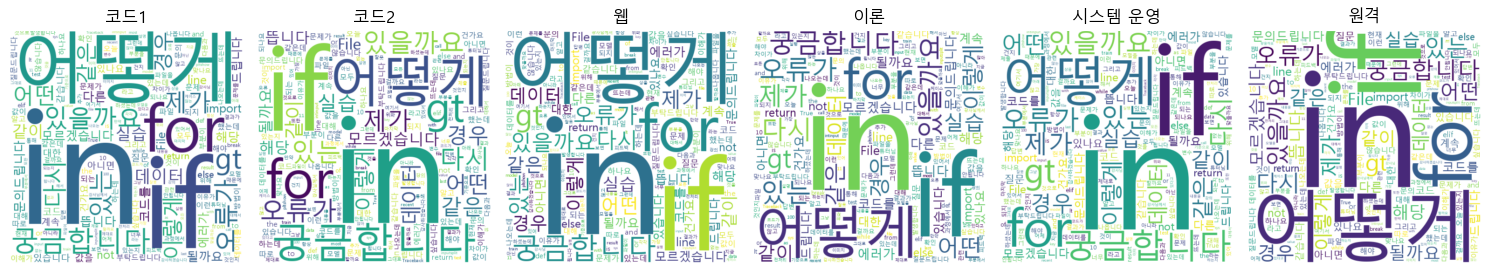

In [108]:
type_questions = data[data['문의유형'].isin(['코드1', '코드2', '웹', '이론', '시스템 운영', '원격'])]['한글자제거']

word_list = []
for sent in type_questions:
    words = sent
    word_list.extend(words)

ALL = Counter(word_list)

plt.figure(figsize=(15, 10))

for idx, title in enumerate(['코드1', '코드2', '웹', '이론', '시스템 운영', '원격']):
    word_dict = dict(ALL)
    wordcloud = WordCloud(width=500, height=500, background_color='white', font_path=font_path).generate_from_frequencies(word_dict)
    
    
    plt.subplot(1, 6, idx + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

----------
----------

----------

# 수고하셨습니다.

----------